# Exercise 10

## (a)

In [1]:
library(ISLR)
names(Weekly)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [2]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [3]:
str(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


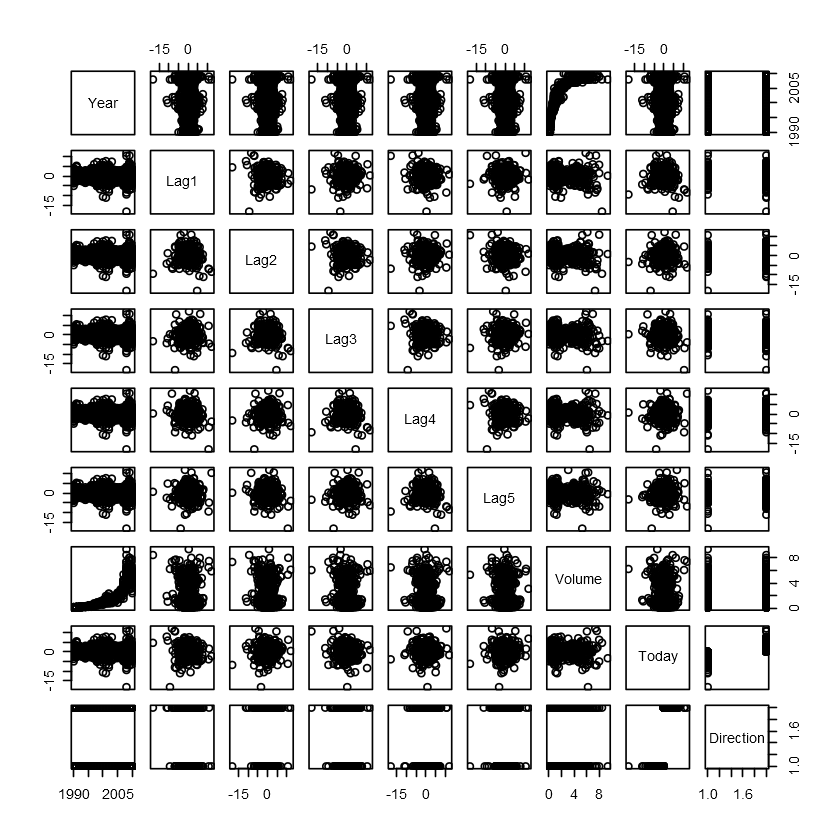

In [4]:
pairs(Weekly)

In [5]:
attach(Weekly)

## (b)

In [6]:
glm.fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
              data=Weekly, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The smallest p-value here is associated with the intercept, indicating that the features don't seem to have much predicting power. Among the features, Lag2 has the smallest p-value, but it still a bit high at approximately 0.03

## (c)

In [7]:
glm.probs = predict(glm.fit, type="response")
glm.probs[1:5]

1         2         3         4         5 
0.6086249 0.6010314 0.5875699 0.4816416 0.6169013

In [8]:
glm.pred = rep("Down", nrow(Weekly))
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [9]:
mean(glm.pred == Direction)

[1] 0.5610652

We are doing marginally better than random guessing even after comparing the predictions on the training data. A training error rate of approximately 43.9%

## (d)

In [10]:
train = (Year < 2009)
Weekly.0910 = Weekly[!train, ]
Direction.0910 = Direction[!train]
glm2.fit = glm(Direction ~ Lag2, data=Weekly, family=binomial, subset=train)
summary(glm2.fit)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [11]:
glm2.probs = predict(glm2.fit, Weekly.0910, type="response")
glm2.pred = rep("Down", nrow(Weekly.0910))
glm2.pred[glm2.probs > 0.5] = "Up"
table(glm2.pred, Direction.0910)

         Direction.0910
glm2.pred Down Up
     Down    9  5
     Up     34 56

In [12]:
mean(glm2.pred == Direction.0910)

[1] 0.625

## (e)

In [13]:
library(MASS)
lda.fit = lda(Direction ~ Lag2, data=Weekly, subset=train)
lda.fit

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

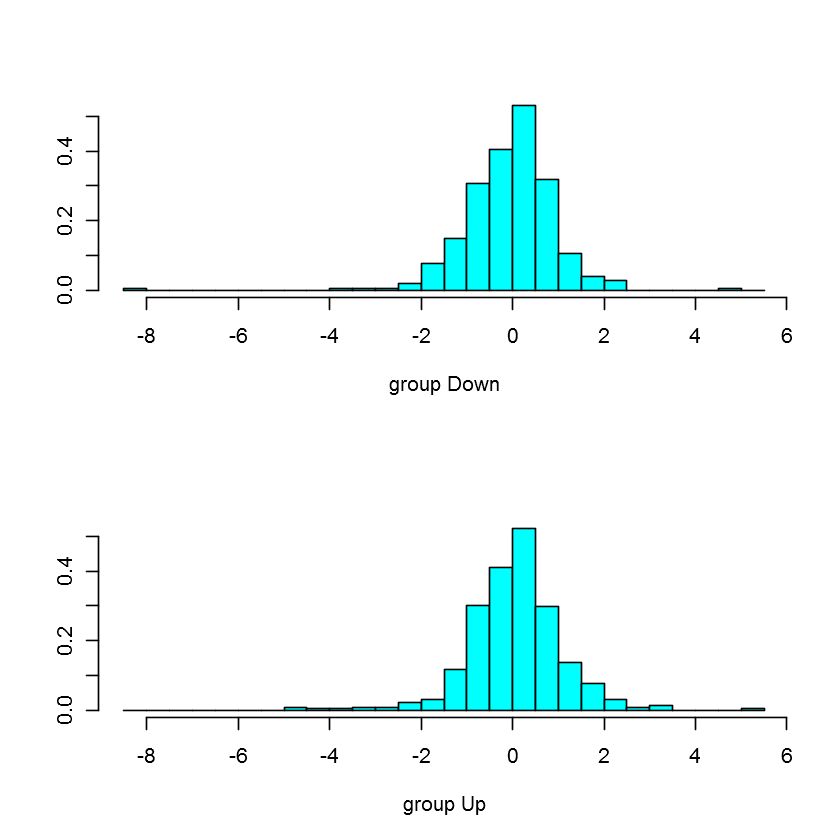

In [14]:
plot(lda.fit)

In [15]:
lda.class = predict(lda.fit, Weekly.0910)$class
table(lda.class, Direction.0910)

         Direction.0910
lda.class Down Up
     Down    9  5
     Up     34 56

In [16]:
mean(lda.class == Direction.0910)

[1] 0.625

## (f)

In [17]:
qda.fit = qda(Direction ~ Lag2, data=Weekly, subset=train)
qda.fit

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [18]:
qda.class = predict(qda.fit, Weekly.0910)$class
table(qda.class, Direction.0910)

         Direction.0910
qda.class Down Up
     Down    0  0
     Up     43 61

In [19]:
mean(qda.class == Direction.0910)

[1] 0.5865385

## (g)

In [20]:
library(class)
train.X = matrix(Lag2[train], ncol=1)
test.X = matrix(Lag2[!train], ncol=1)
train.Direction = Direction[train]
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k=1)
table(knn.pred, Direction.0910)

        Direction.0910
knn.pred Down Up
    Down   21 30
    Up     22 31

In [21]:
mean(knn.pred == Direction.0910)

[1] 0.5

This is worse that just guessing according to the estimated prior probabilities.

## (h)

LDA and Logistic Regression seem to perform equally well on this data set.

## (i)

In [22]:
knn.pred = knn(train.X, test.X, train.Direction, k=3)
table(knn.pred, Direction.0910)

        Direction.0910
knn.pred Down Up
    Down   16 19
    Up     27 42

In [23]:
mean(knn.pred == Direction.0910)

[1] 0.5576923

In [24]:
knn.pred = knn(train.X, test.X, train.Direction, k=5)
table(knn.pred, Direction.0910)

        Direction.0910
knn.pred Down Up
    Down   16 21
    Up     27 40

In [25]:
mean(knn.pred == Direction.0910)

[1] 0.5384615

In [26]:
detach(Weekly)

# Exercise 11

## (a)

In [27]:
Auto1 = transform(Auto, mpg01 = (mpg > median(mpg)))
summary(Auto1)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [28]:
str(Auto1)

'data.frame':	392 obs. of  10 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
 $ mpg01       : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


## (b)

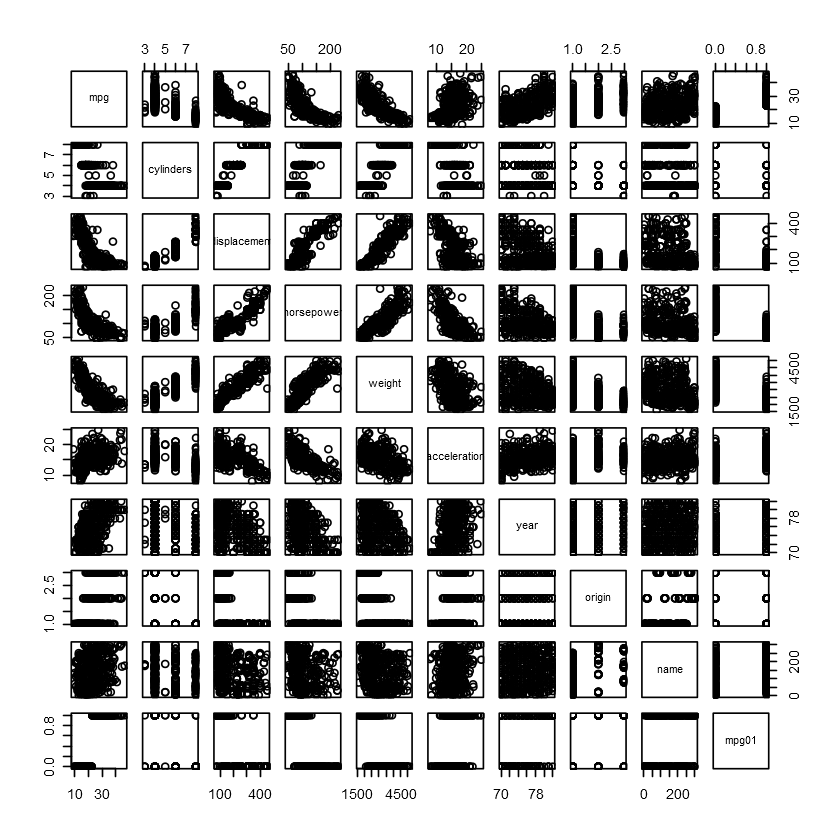

In [29]:
pairs(Auto1)

The most relevant features seem to be cylinders, displacement, horsepower, weight, acceleration and year.

## (c)

In [30]:
attach(Auto1)
testp   = 0.1 # Percentage of observations reserved for 

test    = sample(nrow(Auto1), round(nrow(Auto1)*testp))
test.X  = Auto1[test, ]
train.X = Auto1[-test, ]
test.Y  = mpg01[test]
train.Y = mpg01[-test]

## (d)

In [31]:
lda.fit = lda(mpg01 ~ cylinders + displacement + horsepower + weight +
              acceleration + year, data=train.X)
lda.fit

Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight + 
    acceleration + year, data = train.X)

Prior probabilities of groups:
   FALSE     TRUE 
0.509915 0.490085 

Group means:
      cylinders displacement horsepower   weight acceleration     year
FALSE  6.766667     272.4222  130.89444 3616.739     14.56444 74.41667
TRUE   4.208092     116.9104   79.21387 2346.590     16.54335 77.61850

Coefficients of linear discriminants:
                      LD1
cylinders    -0.428773378
displacement -0.000174505
horsepower    0.008970074
weight       -0.001192238
acceleration  0.006785131
year          0.125217135

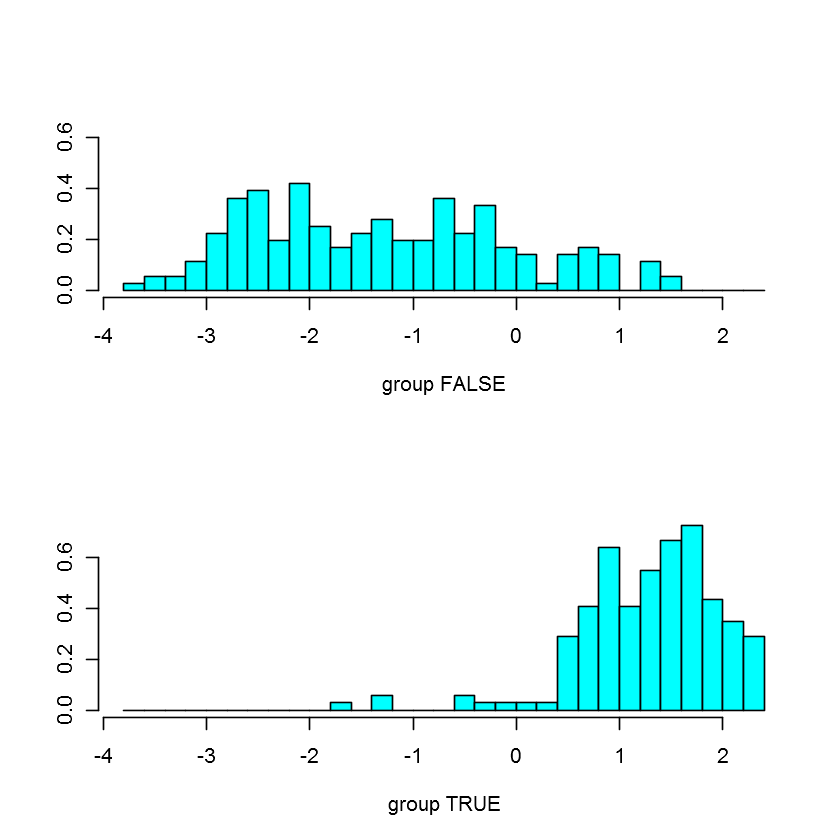

In [32]:
plot(lda.fit)

In [33]:
lda.class = predict(lda.fit, test.X)$class
table(lda.class, test.Y)

         test.Y
lda.class FALSE TRUE
    FALSE    16    0
    TRUE      0   23

In [34]:
mean(lda.class == test.Y)

[1] 1

Perfect predictions on the test set! A test error of 0%. This is a bit lucky though. Another partitioning of the data set is not guranteed to yield a 0% test error. In fact, it's highly likely that test error will be greater that 0%. But this does indicate that LDA is able to do a good job. Comment the line `set.seed(1)` to see the results with another random partition.

## (e)

In [35]:
qda.fit = qda(mpg01 ~ cylinders + displacement + horsepower + weight +
              acceleration + year, data=train.X)
qda.fit

Call:
qda(mpg01 ~ cylinders + displacement + horsepower + weight + 
    acceleration + year, data = train.X)

Prior probabilities of groups:
   FALSE     TRUE 
0.509915 0.490085 

Group means:
      cylinders displacement horsepower   weight acceleration     year
FALSE  6.766667     272.4222  130.89444 3616.739     14.56444 74.41667
TRUE   4.208092     116.9104   79.21387 2346.590     16.54335 77.61850

In [36]:
qda.class = predict(qda.fit, test.X)$class
table(qda.class, test.Y)

         test.Y
qda.class FALSE TRUE
    FALSE    16    0
    TRUE      0   23

In [37]:
mean(qda.class == test.Y)

[1] 1

QDA performs just as well.

## (f)

In [38]:
lg.fit = glm(mpg01 ~ cylinders + displacement + horsepower + weight +
              acceleration + year, data=train.X, family=binomial)
summary(lg.fit)


Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight + acceleration + year, family = binomial, data = train.X)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1010  -0.1281  -0.0009   0.2399   3.2055  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -16.381447   5.765658  -2.841 0.004494 ** 
cylinders      0.042938   0.409364   0.105 0.916463    
displacement  -0.006466   0.010178  -0.635 0.525244    
horsepower    -0.035046   0.023971  -1.462 0.143737    
weight        -0.003884   0.001092  -3.557 0.000376 ***
acceleration   0.008398   0.142920   0.059 0.953141    
year           0.412064   0.074120   5.559 2.71e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 489.22  on 352  degrees of freedom
Residual deviance: 152.27  on 346  degrees of freedom
AIC: 166.27

Number of Fisher Scoring iterations: 

In [39]:
lg.probs = predict(lg.fit, test.X, type="response")
lg.pred = rep(FALSE, nrow(test.X))
lg.pred[lg.probs > 0.5] = TRUE
table(lg.pred, test.Y)

       test.Y
lg.pred FALSE TRUE
  FALSE    16    1
  TRUE      0   22

In [40]:
mean(lg.pred == test.Y)

[1] 0.974359

Just as good as LDA and QDA.

## (g)

In [41]:
std.X = scale(Auto1[ , 1:7])
ts.std.X = std.X[test, ]
tr.std.X = std.X[-test, ]
knn.pred = knn(tr.std.X, ts.std.X, train.Y, k=1)
mean(knn.pred == test.Y)

[1] 0.974359

In [42]:
knn.pred = knn(tr.std.X, ts.std.X, train.Y, k=3)
mean(knn.pred == test.Y)

[1] 0.974359

In [43]:
knn.pred = knn(tr.std.X, ts.std.X, train.Y, k=5)
mean(knn.pred == test.Y)

[1] 1

$ K = 5 $ seems to perform best.

In [44]:
detach(Auto1)

# Excercise 13

In [45]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [46]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


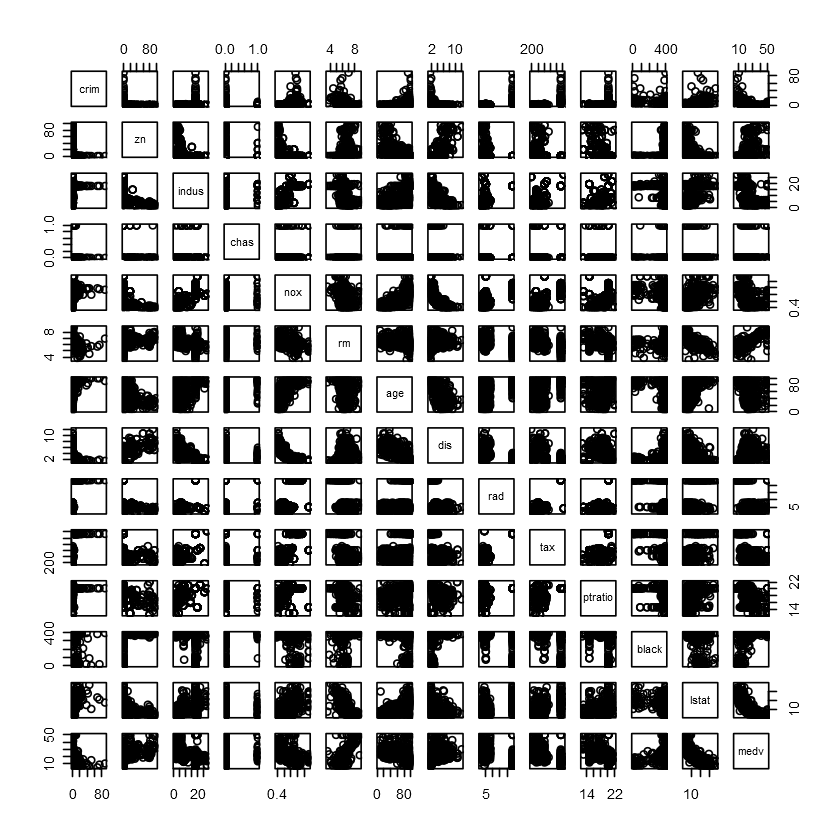

In [47]:
pairs(Boston)

## LDA

In [48]:
Boston1 = transform(Boston, crim01 = (crim > median(crim)))
attach(Boston1)
testp   = 0.1 # Percentage of observations reserved for 

test    = sample(nrow(Boston1), round(nrow(Boston1)*testp))
test.X  = Boston1[test, ]
train.X = Boston1[-test, ]
test.Y  = crim01[test]
train.Y = crim01[-test]

lda.fit = lda(crim01 ~ zn + indus + rm + rad + tax + black +
              age + dis + ptratio + lstat + medv, data=train.X)
lda.fit

Call:
lda(crim01 ~ zn + indus + rm + rad + tax + black + age + dis + 
    ptratio + lstat + medv, data = train.X)

Prior probabilities of groups:
    FALSE      TRUE 
0.5010989 0.4989011 

Group means:
             zn     indus       rm       rad      tax    black      age
FALSE 21.910088  6.872061 6.404535  4.149123 304.6754 388.8701 50.83860
TRUE   1.339207 14.977577 6.198714 14.656388 503.9207 324.9135 85.38238
           dis  ptratio     lstat     medv
FALSE 5.085827 17.85614  9.300789 25.15044
TRUE  2.540652 18.98811 15.623921 20.60396

Coefficients of linear discriminants:
                  LD1
zn      -0.0046966934
indus    0.0464636928
rm       0.1032898020
rad      0.0897242473
tax     -0.0007040942
black   -0.0013799354
age      0.0193114536
dis     -0.0991992244
ptratio -0.0317917440
lstat    0.0080774044
medv     0.0175007025

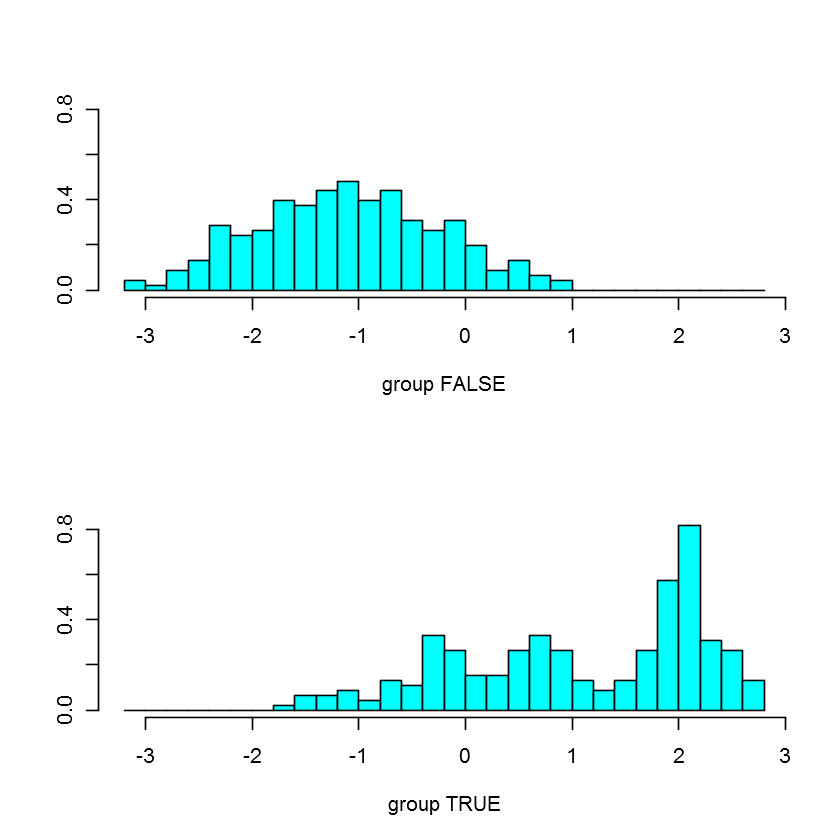

In [49]:
plot(lda.fit)

In [50]:
lda.class = predict(lda.fit, test.X)$class
mean(lda.class == test.Y)

[1] 0.9019608

## QDA

In [51]:
qda.fit = qda(crim01 ~ zn + indus + rm + rad + tax + black +
              age + dis + ptratio + lstat + medv, data=train.X)
qda.fit

Call:
qda(crim01 ~ zn + indus + rm + rad + tax + black + age + dis + 
    ptratio + lstat + medv, data = train.X)

Prior probabilities of groups:
    FALSE      TRUE 
0.5010989 0.4989011 

Group means:
             zn     indus       rm       rad      tax    black      age
FALSE 21.910088  6.872061 6.404535  4.149123 304.6754 388.8701 50.83860
TRUE   1.339207 14.977577 6.198714 14.656388 503.9207 324.9135 85.38238
           dis  ptratio     lstat     medv
FALSE 5.085827 17.85614  9.300789 25.15044
TRUE  2.540652 18.98811 15.623921 20.60396

In [52]:
qda.class = predict(qda.fit, test.X)$class
mean(qda.class == test.Y)

[1] 0.9215686

## Logistic Regression

In [53]:
lg.fit = glm(crim01 ~ zn + indus + rm + rad + tax + black +
              age + dis + ptratio + lstat + medv, data=train.X, family=binomial)
summary(lg.fit)


Call:
glm(formula = crim01 ~ zn + indus + rm + rad + tax + black + 
    age + dis + ptratio + lstat + medv, family = binomial, data = train.X)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.10753  -0.47667  -0.00974   0.01054   2.51267  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.233272   4.034185  -0.306  0.75983    
zn          -0.044488   0.020212  -2.201  0.02773 *  
indus        0.064650   0.035589   1.817  0.06928 .  
rm           0.202078   0.560832   0.360  0.71861    
rad          0.617654   0.136243   4.533  5.8e-06 ***
tax         -0.005065   0.002520  -2.010  0.04443 *  
black       -0.015192   0.006447  -2.356  0.01845 *  
age          0.027873   0.009394   2.967  0.00301 ** 
dis         -0.259604   0.142465  -1.822  0.06842 .  
ptratio      0.057814   0.089717   0.644  0.51932    
lstat        0.037614   0.040522   0.928  0.35327    
medv         0.045934   0.049024   0.937  0.34877    
---
Signif. cod

It's interesting to note that the most significant predictor seems to be the index of accessibility to radial highways (rad). Let's re-run QDA and LDA with this reduced set of features.

In [54]:
lg.probs = predict(lg.fit, test.X, type="response")
lg.pred = rep(FALSE, nrow(test.X))
lg.pred[lg.probs > 0.5] = TRUE
mean(lg.pred == test.Y)

[1] 0.9019608

## QDA'

In [55]:
qda.fit = qda(crim01 ~ zn + rad + black + age + dis, data=train.X)
qda.fit

Call:
qda(crim01 ~ zn + rad + black + age + dis, data = train.X)

Prior probabilities of groups:
    FALSE      TRUE 
0.5010989 0.4989011 

Group means:
             zn       rad    black      age      dis
FALSE 21.910088  4.149123 388.8701 50.83860 5.085827
TRUE   1.339207 14.656388 324.9135 85.38238 2.540652

In [56]:
qda.class = predict(qda.fit, test.X)$class
mean(qda.class == test.Y)

[1] 0.8235294

## LDA'

In [57]:
lda.fit = lda(crim01 ~ zn + rad + black + age + dis, data=train.X)
lda.fit

Call:
lda(crim01 ~ zn + rad + black + age + dis, data = train.X)

Prior probabilities of groups:
    FALSE      TRUE 
0.5010989 0.4989011 

Group means:
             zn       rad    black      age      dis
FALSE 21.910088  4.149123 388.8701 50.83860 5.085827
TRUE   1.339207 14.656388 324.9135 85.38238 2.540652

Coefficients of linear discriminants:
               LD1
zn    -0.002145134
rad    0.080593664
black -0.001304117
age    0.019813297
dis   -0.190021911

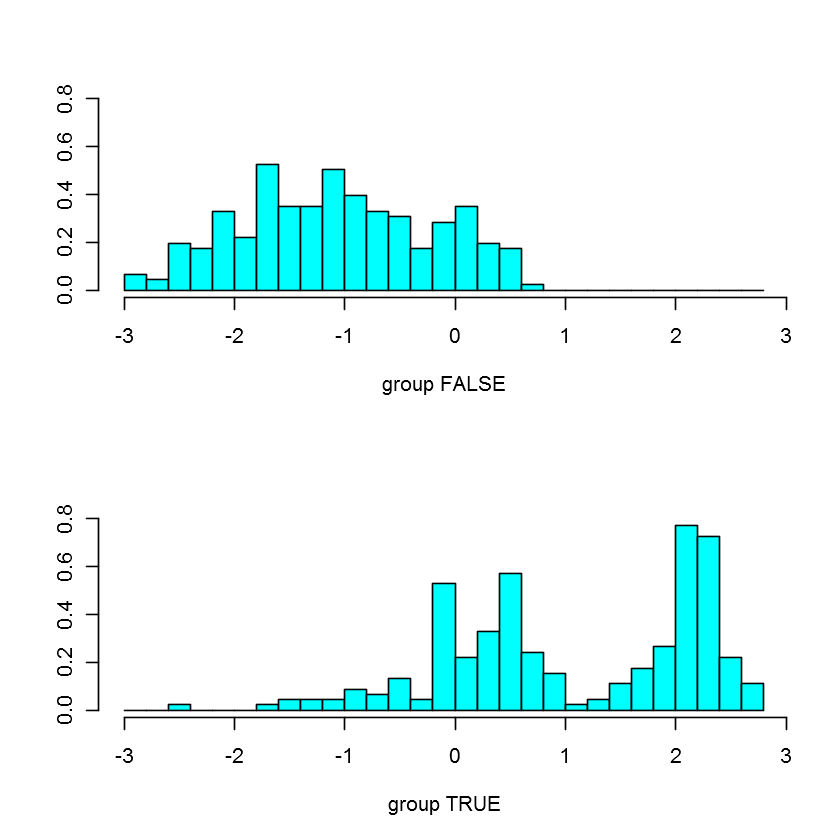

In [58]:
plot(lda.fit)

In [59]:
lda.class = predict(lda.fit, test.X)$class
mean(lda.class == test.Y)

[1] 0.8823529

## KNN

In [60]:
std.X = scale(Boston1[ , 2:ncol(Boston)])
ts.std.X = std.X[test, ]
tr.std.X = std.X[-test, ]
knn.pred = knn(tr.std.X, ts.std.X, train.Y, k=1)
mean(knn.pred == test.Y)

[1] 0.9607843

In [61]:
knn.pred = knn(tr.std.X, ts.std.X, train.Y, k=3)
mean(knn.pred == test.Y)

[1] 0.9607843

In [62]:
knn.pred = knn(tr.std.X, ts.std.X, train.Y, k=5)
mean(knn.pred == test.Y)

[1] 0.9607843

Overall, KNN and QDA seems to perform better on this dataset indicating that the Bayes decision boundary is non-linear.